Task 1
Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are network growing and prefferential attachment. Implement two restricted B&A-based models: <br >
Model A <br > Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

Model B <br > Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment. <br >
1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies:

    average path length to the number of nodes
    
    average clustering coefficient to the number of nodes
    
    average node degee to the nodes "age"
    
Is scale-free property conserved in these models?
Analyse results with respect to various parameter settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

In [2]:
N = 1001

Now let's generate a network for model A. At first we will build a graph with $n_0 = 50$ nodes and with $200 = m_0\ge n_0$. And at each step we will add one node and connect it with $m = 8$ edges with $m$ already existing nodes randomly chosen by uniform distribution. We will stop when Ga.number_of_nodes() reaches N.

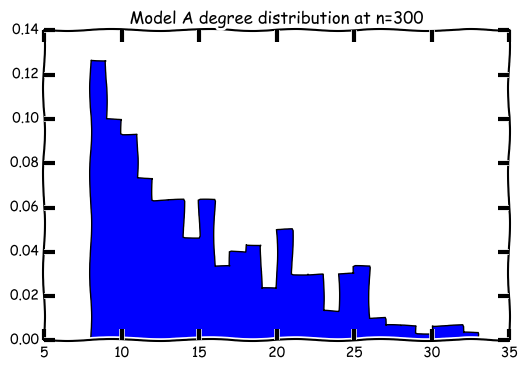

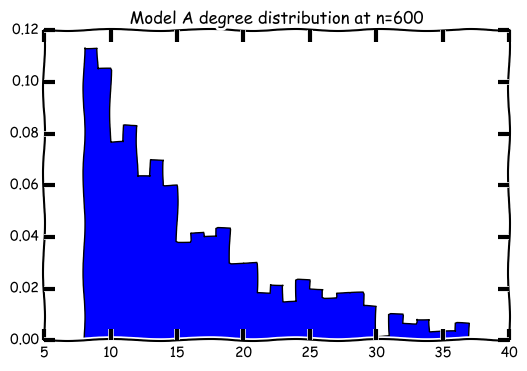

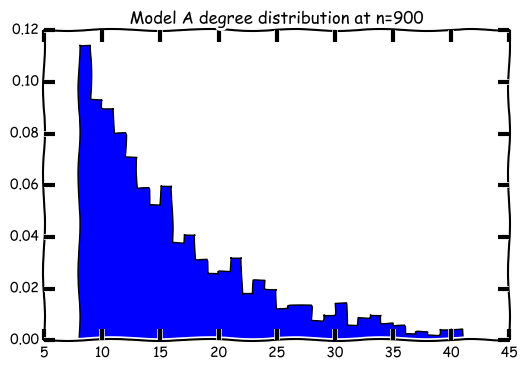

In [22]:
Ga = nx.Graph()
n0 = 50
m0 = 200
m = 8
for i in range(n0):
    Ga.add_node(i)
i = 0
while i < m0:
    j = np.floor(np.dot(n0, np.random.rand()))
    k = np.floor(np.dot(n0, np.random.rand()))
    if (not Ga.has_edge(j, k)) and (not j == k):
        Ga.add_edge(j, k)
        i += 1
N_of_nodes = np.array([n0])
Path_len = np.array([AvPath(Ga)])
Cl_coef = np.array([AvClust(Ga)])
Deg = np.array([])
Nodes = np.array([])
while Ga.number_of_nodes() < N:
    v = Ga.number_of_nodes()
    Ga.add_node(v)
    i = 0
    while i < m:
        w = np.floor(np.dot(Ga.number_of_nodes() - 1, np.random.rand()))
        if not Ga.has_edge(v, w):
            Ga.add_edge(v, w)
            i += 1
    N_of_nodes = np.append(N_of_nodes, Ga.number_of_nodes())
    Path_len = np.append(Path_len, AvPath(Ga))
    Cl_coef = np.append(Cl_coef, AvClust(Ga))
    if Ga.number_of_nodes() % 300 == 0:
        plt.figure()
        plt.title('Model A degree distribution at n='+str(Ga.number_of_nodes()))
        plt.hist(list(Ga.degree().values()), np.ptp(list(Ga.degree().values())), normed = True, histtype = 'stepfilled')
        plt.show()
for i in range(Ga.number_of_nodes()):
    Nodes = np.append(Nodes, i)
    Deg = np.append(Deg, Ga.degree(i))

Now let's generate network for model B. At the beginning we have $N$ nodes and $0$ edges. Then we 100000 times (to make Gb.number_of_edges() = 100000) randomly choose one node and preferentially attach it with $1$ edge node $i$ with probability $Pr(i) = \frac{k_i+1}{N-1-k_i+\sum_j k_j}$.

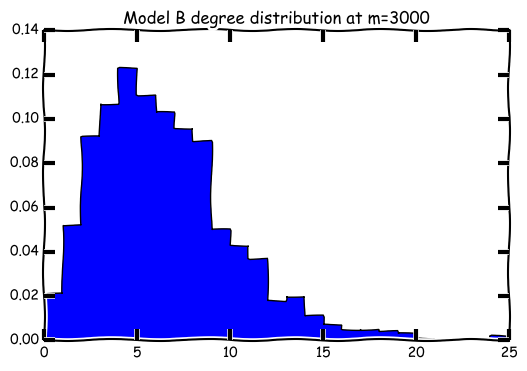

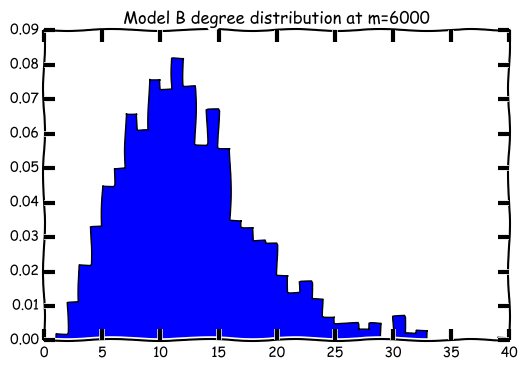

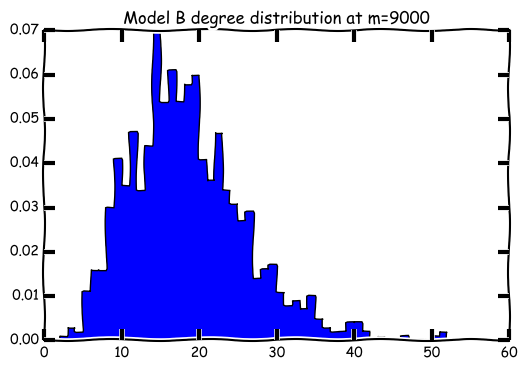

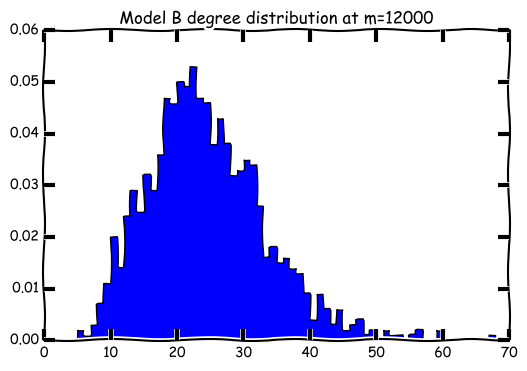

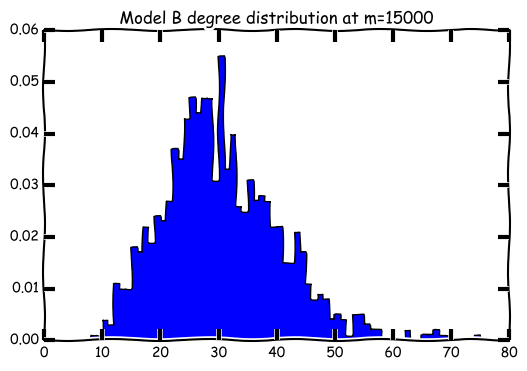

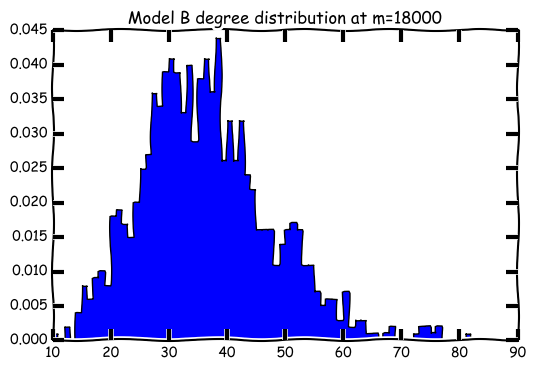

In [27]:
Gb = nx.Graph()
for i in range(N):
    Gb.add_node(i)
M = 20000
index = 0
Pr = []
for i in range(N):
    Pr.append(i)
lenPr = N
while index < M:
    m = Gb.number_of_edges()
    v = np.floor(np.dot(N, np.random.rand()))#We randomly choose a node
    while Gb.degree(v) == N - 1: #If we've accidentally chosen a node which is already connected with every other node, we choose
        v = np.floor(np.dot(N, np.random.rand()))#another one
    w = Pr[int(np.floor(np.dot(lenPr, np.random.rand())))]#we preferentially choose node w and add an edge if possible
    if (not Gb.has_edge(v, w)) and (not v == w):
        Gb.add_edge(v, w)
        Pr.append(v)
        Pr.append(w)
        lenPr += 2
        index += 1
    if index % 3000 == 0:
        plt.figure()
        plt.title('Model B degree distribution at m='+str(Gb.number_of_edges()))
        plt.hist(list(Gb.degree().values()), bins = np.ptp(list(Gb.degree().values())), normed = True, histtype = 'stepfilled')
        plt.show()
        #print(index)

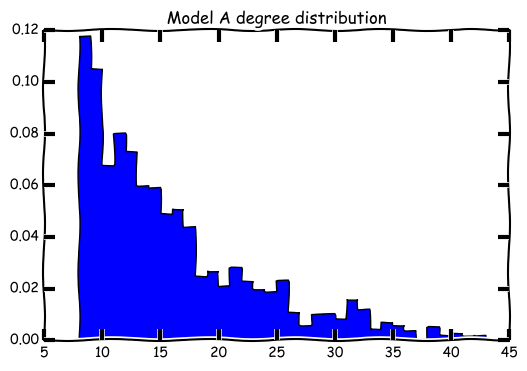

In [8]:
plt.figure()
plt.title('Model A degree distribution')
plt.hist(list(Ga.degree().values()), bins = np.ptp(list(Ga.degree().values())), normed = True, histtype = 'stepfilled')
plt.show()

Here I am going to describe some properties of model A degree distribution:

$k_i(t+\delta t) = k_i(t) + \frac{\binom{n-1}{m-1}}{\binom{n}{m}} = k_i(t) + \frac{m}{n(t)}\Rightarrow$

$\Rightarrow \frac{dk_i}{dt} = \frac{m}{n(t)}\Leftrightarrow \int_m^{k_i(t)}dk_i = \int_i^t\frac{mdt}{t+i}\Rightarrow$

$\Rightarrow k_i(t) - m = m\ln t - \ln i\Leftrightarrow k_i(t) = m\ln\frac{et}{i}$

Thus,

$k_i(t) \leq k \Leftrightarrow m\ln\frac{et}{i}\leq k \Leftrightarrow i\geq \frac{t}{e^{\frac{k}{m}-1}}$

And

$F(k) \approx 1 - \frac{1}{e^{\frac{k}{m}-1}}$

$P(k) = e^{1 - \frac{k}{m}}$

So, degree distribution is exponential law as could be seen on log scale plot.

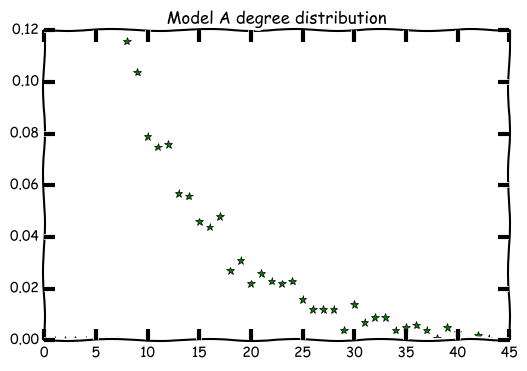

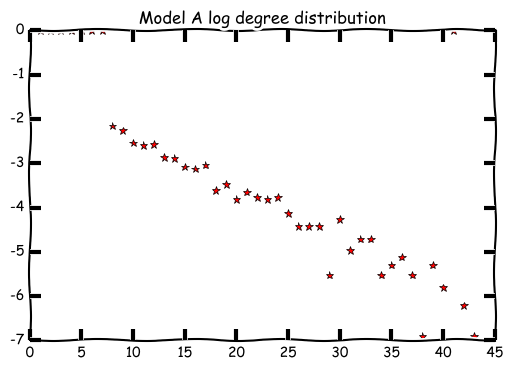

In [28]:
MAdeg = np.array([])
for i in range(1 + max(Ga.degree().values())):
    MAdeg = np.append(MAdeg, 0)
for i in list(Ga.degree().values()):
    MAdeg[i] += 1
S = np.sum(MAdeg)
for i in range(len(MAdeg)):
    MAdeg[i] = np.divide(MAdeg[i], S)
plt.figure()
plt.title('Model A degree distribution')
plt.plot(MAdeg, '*', color = 'g')
plt.show()
logMAdeg = [0] * len(MAdeg)
for i in range(len(MAdeg)):
    if MAdeg[i] > 0:
        logMAdeg[i] = np.log(MAdeg[i])
plt.figure()
plt.title('Model A log degree distribution')
plt.plot(logMAdeg, '*', color = 'r')
plt.show()

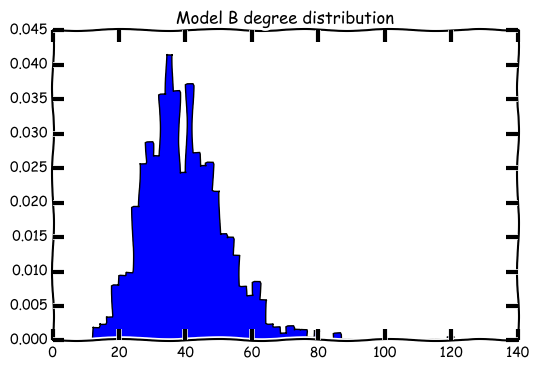

In [26]:
plt.figure()
plt.title('Model B degree distribution')
plt.hist(list(Gb.degree().values()), bins = int(np.divide(np.ptp(list(Gb.degree().values())), 2)), normed = True, histtype = 'stepfilled')
plt.show()

Here I'm going to describe some properties of model B degree distribution:

$\frac{dk_i(t)}{dt} = \frac{1}{N} + \frac{N-1}{N}\frac{1+k_i(t)}{N-1+2t-k_i(t)}$

This equation looks kind of complicated, but for $t$ large enough it looks like this:

$\frac{dk_i(t)}{dt} = \frac{1}{N} + \frac{N-1}{N}\frac{k_i(t)}{2t}$

And the solution is:

$k_i(t) = \frac{t}{N} + c t^{\frac{N-1}{2N}}$

where $c$ is a constant value.

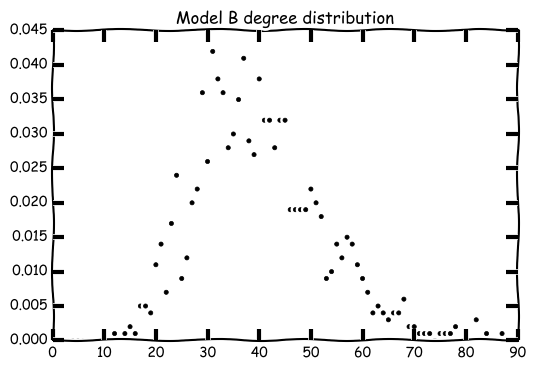

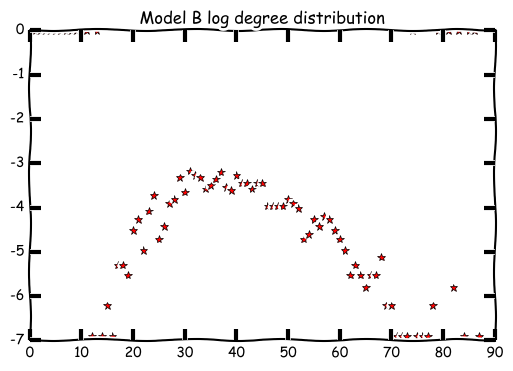

In [29]:
MBdeg = np.array([])
for i in range(1 + max(Gb.degree().values())):
    MBdeg = np.append(MBdeg, 0)
for i in list(Gb.degree().values()):
    MBdeg[i] += 1
S = np.sum(MBdeg)
for i in range(len(MBdeg)):
    MBdeg[i] = np.divide(MBdeg[i], S)
plt.figure()
plt.title('Model B degree distribution')
plt.plot(MBdeg, '.', color = 'k')
plt.show()
logMBdeg = [0] * len(MBdeg)
for i in range(len(MBdeg)):
    if MBdeg[i] > 0:
        logMBdeg[i] = np.log(MBdeg[i])
plt.figure()
plt.title('Model B log degree distribution')
plt.plot(logMBdeg, '*', color = 'r')
plt.show()

Now let's try to compute the dependancy between number of nodes and average path length for model A only because there is no sense to do it for a model with fixed number of nodes:

In [12]:
def AvPath(G):
    pls = np.array([])
    n0 = G.number_of_nodes()
    for i in range(100):
        v = np.floor(np.dot(n0, np.random.rand()))
        w = np.floor(np.dot(n0, np.random.rand()))
        if nx.has_path(G, v, w):
            pls = np.append(pls, nx.shortest_path_length(G, v, w))
    M = np.mean(pls)
    return M

In [13]:
def AvClust(G):
    n0 = G.number_of_nodes()
    Clust = np.array([])
    for i in range(100):
        a = np.floor(np.dot(n0, np.random.rand()))
        Clust = np.append(Clust, nx.clustering(G, a))
    M = np.mean(Clust)
    return M

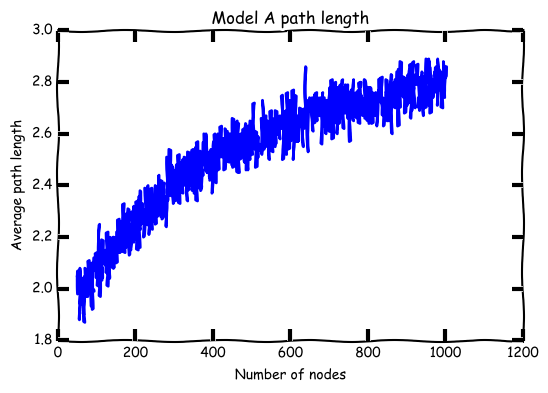

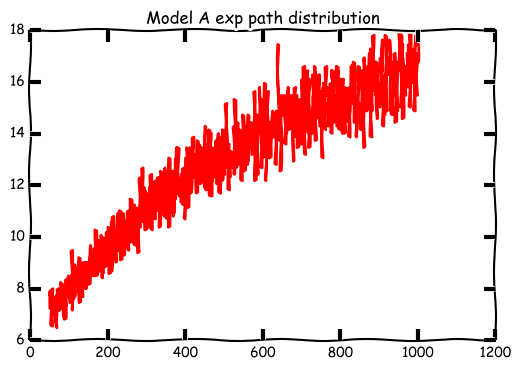

In [14]:
plt.figure()
plt.plot(N_of_nodes, Path_len, color = 'b')
plt.title('Model A path length')
plt.xlabel('Number of nodes')
plt.ylabel('Average path length')
plt.show()
sqPL = np.exp(Path_len)
plt.figure()
plt.title('Model A exp path distribution')
plt.plot(N_of_nodes, sqPL, color = 'r')
plt.show()

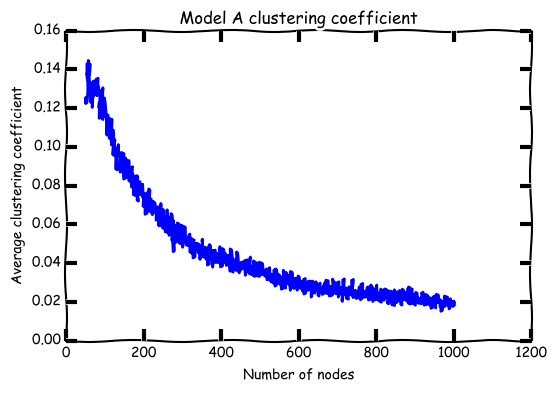

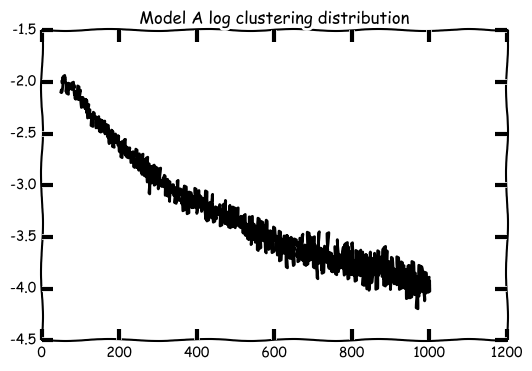

In [15]:
plt.figure()
plt.plot(N_of_nodes, Cl_coef, color = 'b')
plt.title('Model A clustering coefficient')
plt.xlabel('Number of nodes')
plt.ylabel('Average clustering coefficient')
plt.show()
expCC = np.log(Cl_coef)
plt.figure()
plt.title('Model A log clustering distribution')
plt.plot(N_of_nodes, expCC, color = 'k')
plt.show()

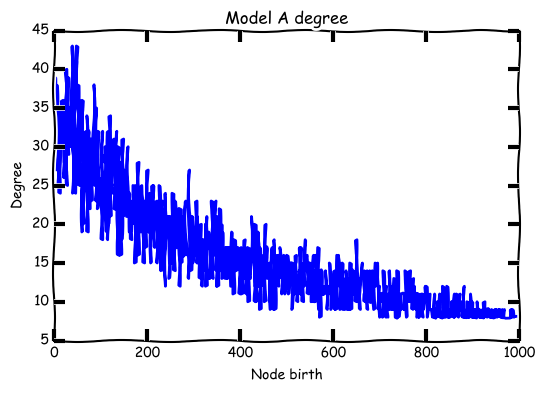

In [16]:
plt.figure()
plt.plot(Nodes, Deg, color = 'b')
plt.title('Model A degree')
plt.xlabel('Node birth')
plt.ylabel('Degree')
plt.show()

Model A degree distribution at first look seems to be scale-free but in log-scale plot shows that this degree distribution is exponential so it's not scale free. Model B degree distribution doesn't look like power law at all.

In [17]:
np.add(2, 3)

5

Task 2
Consider the following "Vertex copying model" of growing network.
At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that every edge of the vertex

1. is copied with probability $q$

2. is rewired to any other randomly selected vertex with probability $1-q$

Starting state is defined by some small number of randomly connected vertices.
The model can generate both directed and undirected networks.
Generate graphs based on the model ($N \ge 1000$ nodes)
Compute CDF/PDF, describe the distribution and compute\describe its properties.
Illustate the following dependencies:

average path length to the number of nodes

average clustering coefficient to the number of nodes

average node degee to the nodes "age"

Analyse results with respect to various parameter settings

We will start our simulation with $n_0=50$ nodes randomly connected with $m_0=200$ edges.
Probability $q = 0.4$

In [18]:
G2 = nx.Graph()
n0 = 50
m0 = 200
q = 0.4
for i in range(n0):
    G2.add_node(i)
i = 0
while i < m0:
    j = np.floor(np.dot(n0, np.random.rand()))
    k = np.floor(np.dot(n0, np.random.rand()))
    if (not G2.has_edge(j, k)) and (not j == k):
        G2.add_edge(j, k)
        i += 1
NumNods = G2.number_of_nodes()
while NumNods < N:
    v = int(np.floor(np.dot(NumNods, np.random.rand())))
    w = NumNods + 1
    G2.add_node(w)
    for i in G2.neighbors(v):
        j = np.random.rand()
        if j <= q:
            G2.add_edge(w, i)
        else:
            k = np.floor(np.dot(NumNods, np.random.rand()))
            while k in G2.neighbors(v):
                k = np.floor(np.dot(NumNods, np.random.rand()))
            G2.add_edge(w, k)
    NumNods += 1

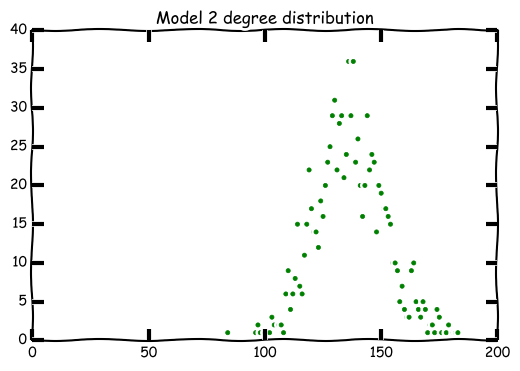

In [19]:
deg2 = np.array([])
for i in range(1 + max(G2.degree().values())):
    deg2 = np.append(deg2, 0)
for i in list(G2.degree().values()):
    deg2[i] += 1
plt.figure()
plt.title('Model 2 degree distribution')
plt.plot(deg2, '.', color = 'g')
plt.show()
#logdeg2 = [0] * len(deg2)
#for i in range(len(deg2)):
#    if deg2[i] > 0:
#        logdeg2[i] = np.log(deg2[i])
#plt.figure()
#plt.title('Model 2 log degree distribution')
#plt.plot(logdeg2, '*', color = 'r')
#plt.show()

In [20]:
#for model A
Ga = nx.Graph()
n0 = 50
m0 = 200
m = 8
for i in range(n0):
    Ga.add_node(i)
i = 0
while i < m0:
    j = np.floor(np.dot(n0, np.random.rand()))
    k = np.floor(np.dot(n0, np.random.rand()))
    if (not Ga.has_edge(j, k)) and (not j == k):
        Ga.add_edge(j, k)
        i += 1
N_of_nodes = np.array([n0])
Path_len = np.array([AvPath(Ga)])
while Ga.number_of_nodes() < N:
    v = Ga.number_of_nodes()
    Ga.add_node(v)
    i = 0
    while i < m:
        w = np.floor(np.dot(Ga.number_of_nodes() - 1, np.random.rand()))
        if not Ga.has_edge(v, w):
            Ga.add_edge(v, w)
            i += 1
    N_of_nodes = np.append(N_of_nodes, Ga.number_of_nodes())
    Path_len = np.append(Path_len, AvPath(Ga))